In [21]:
import pandas as pd
import urllib.request 
url = 'https://raw.githubusercontent.com/onecoinbuybus/Database_chemoinformatics/master/SRU_data.txt'
urllib.request.urlretrieve(url, 'SRU_data.txt') 

sru_data = pd.read_csv('SRU_data.txt',header=None, skiprows=1).iloc[:,0].apply(lambda x: pd.Series(x.split()))
sru_data.columns = ['MEA GAS',
                    'AIR MEA1',
                    'AIR MEA 2',
                    'AIR SWS',
                    'SWS GAS',
                    'H2S',
                    'SO2']
sru_data_array=np.array(sru_data)
sru_data.head()

,MEA GAS,AIR MEA1,AIR MEA 2,AIR SWS,SWS GAS,H2S,SO2
0,6.6311319e-001,7.7427568e-001,4.7097005e-001,9.6043797e-002,1.9865240e-002,8.3362383e-002,1.9147575e-001
1,6.5996003e-001,7.6602112e-001,4.7339843e-001,1.1102285e-001,2.7956697e-002,8.1264999e-002,1.7419153e-001
2,6.5467015e-001,7.6751878e-001,4.7419789e-001,1.0540988e-001,2.8906770e-002,7.9167644e-002,1.6554378e-001
3,6.5332529e-001,7.6992209e-001,4.7596348e-001,6.6221392e-002,2.9410771e-002,7.7070260e-002,1.6818991e-001
4,6.5472610e-001,7.6044864e-001,4.7883328e-001,3.3745797e-002,3.1592118e-002,7.4972877e-002,1.7083602e-001


In [37]:
sru_data_array=np.array(sru_data)

<AxesSubplot:ylabel='H2S'>

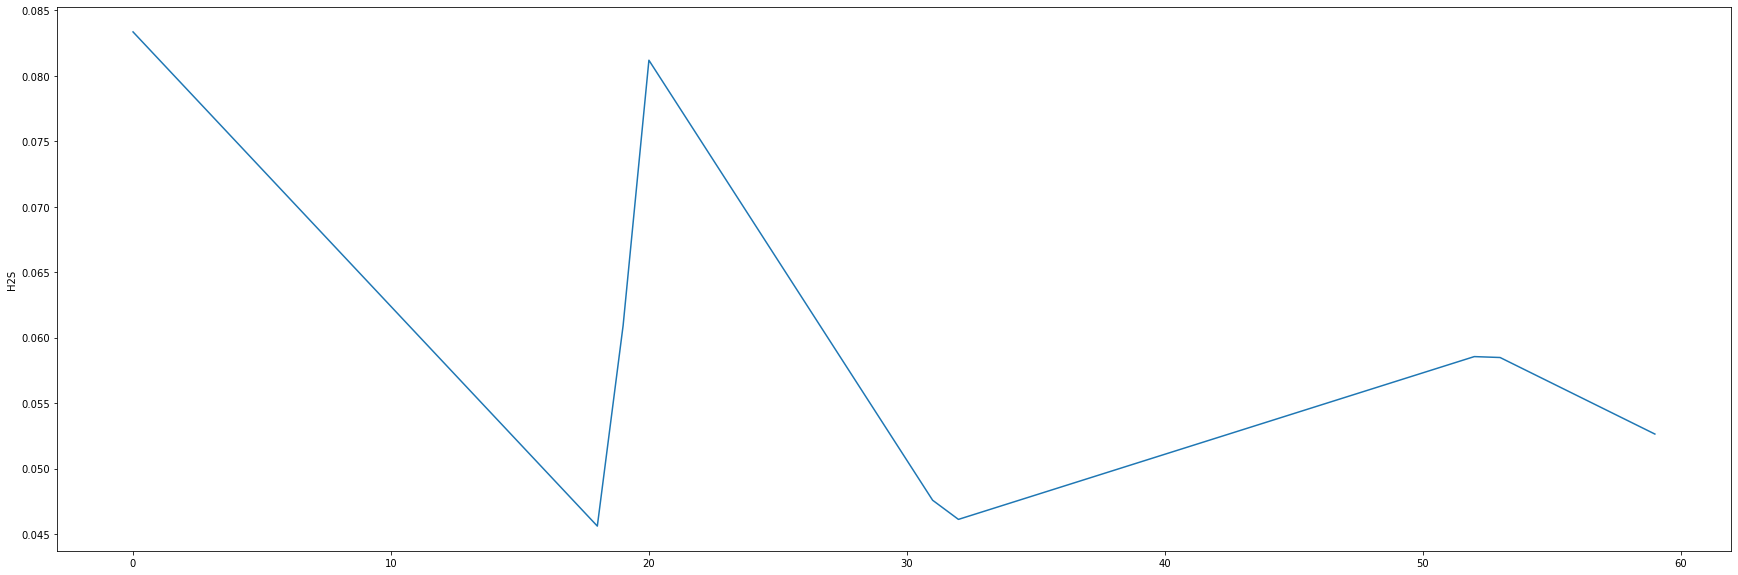

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
sns.lineplot(data=sru_data['H2S'][:60].astype(float))

<AxesSubplot:ylabel='H2S'>

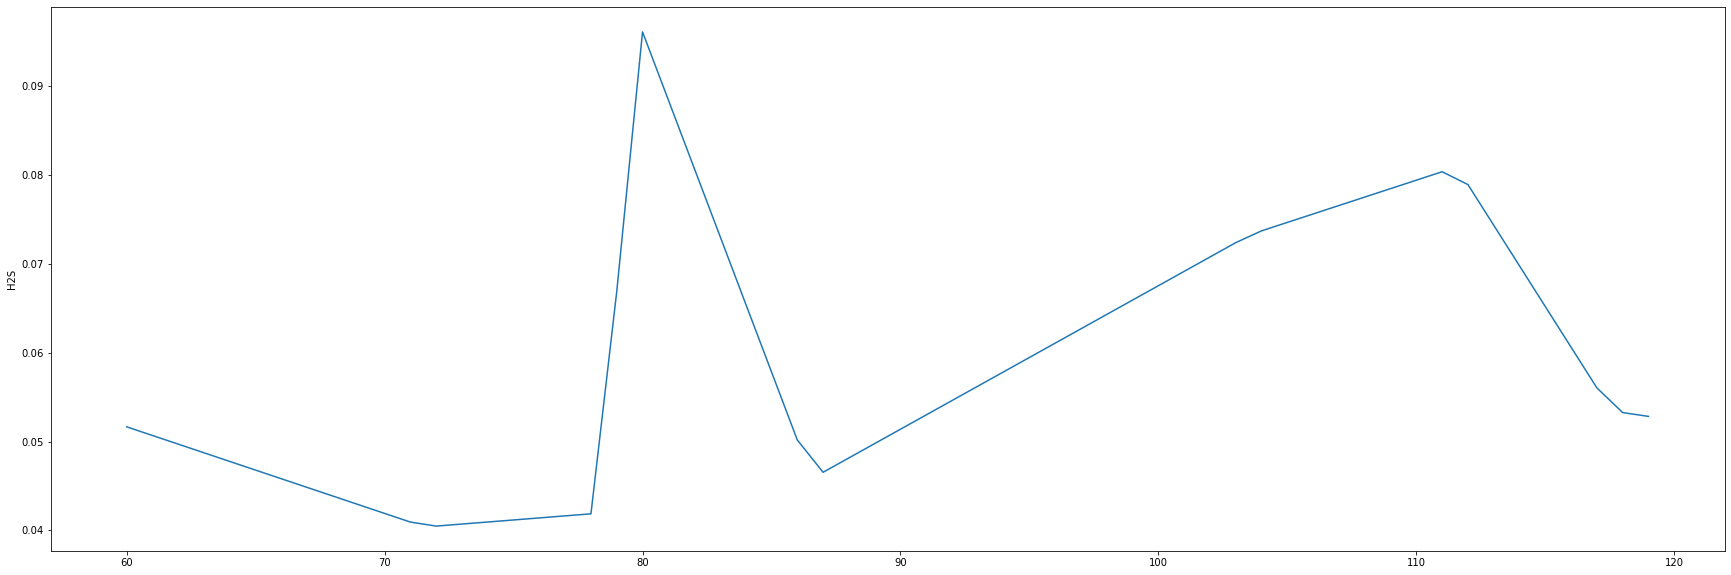

In [24]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=sru_data['H2S'][60:120].astype(float))

<AxesSubplot:ylabel='H2S'>

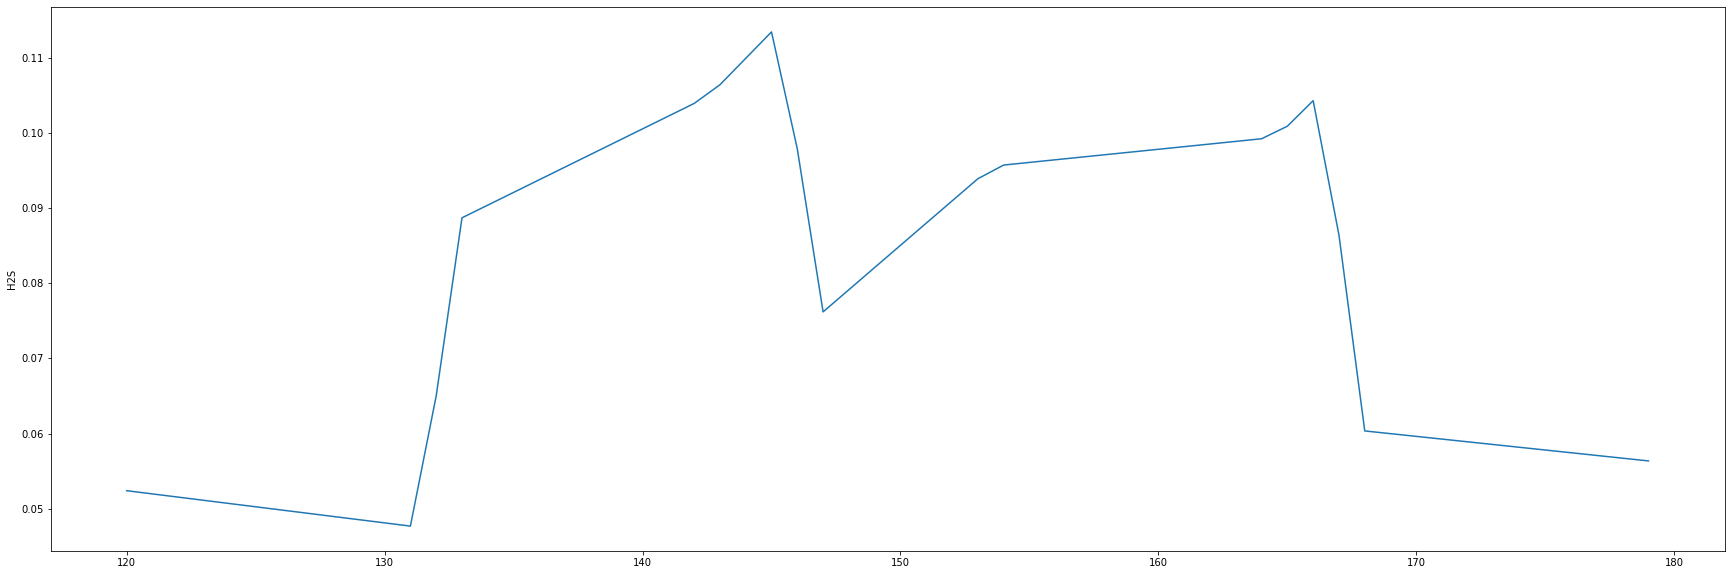

In [25]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=sru_data['H2S'][120:180].astype(float))

<AxesSubplot:ylabel='H2S'>

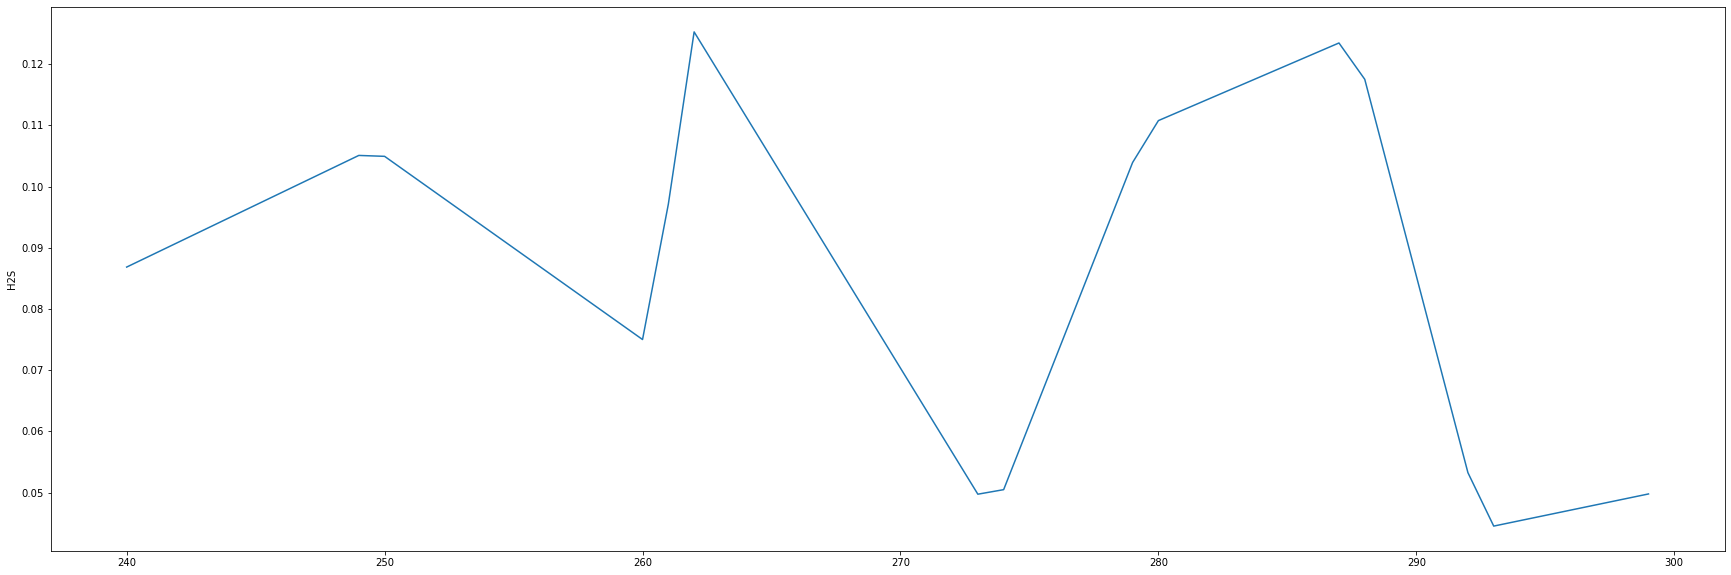

In [26]:
plt.figure(figsize=(30, 10))
sns.lineplot(data=sru_data['H2S'][240:300].astype(float))

In [67]:
def my_generator():
    yield 1
    yield 2
    yield 3

In [71]:
print(list(my_generator()))

<generator object my_generator at 0x7fe2527e2dd0>


In [101]:
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            #挑选任意
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)

        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][-1]
        yield samples, targets

In [107]:
batch_size

128

In [108]:
sru_data_array.shape

(10081, 7)

In [109]:
samples = np.zeros((len(rows),
                           lookback // step,
                           sru_data_array.shape[-1]))
samples.shape # (128, 180, 7) #180个

(128, 180, 7)

In [115]:
samples[0].shape

(180, 7)

In [90]:
for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = sru_data_array[indices]
            targets[j] = sru_data_array[rows[j] + delay][1]  
            print(targets[j])

0.33092424
0.49895507
0.66681183
0.5904153
0.85608797
0.58957943
0.4328503
0.89603653
0.43103919
0.58017557
0.44248047
0.67045138
0.77133261
0.14673306
0.86749456
0.42165288
0.22802315
0.15371617
0.67623304
0.44209744
0.335487
0.1862288
0.59299247
0.68976376
0.89708136
0.77035737
0.85129911
0.49827593
0.5995055
0.90685091
0.86425539
0.85920532
0.59752012
0.89682015
0.91151774
0.51250356
0.34595283
0.31920462
0.8538069
0.51807604
0.335487
0.43046454
0.5238577
0.51487176
0.82773762
0.86362849
0.58585274
0.69551073
0.90284546
0.68450473
0.89791722
0.68307687
0.52350935
0.52354425
0.22467949
0.33346672
0.89534005
0.4370645
0.49303424
0.098791364
0.19079125
0.51941697
0.77394468
0.59224354
0.59880881
0.49582059
0.50430145
0.59071119
0.502142
0.21426591
0.89708136
0.85145583
0.52241228
0.88825236
0.5189468
0.58322312
0.76124961
0.75811512
0.89399912
0.61063313
0.43481812
0.52960425
0.91623723
0.19739132
0.51034411
0.57359295
0.60641892
0.89185701
0.52173314
0.60880468
0.60096826
0.89845698
0

In [100]:
sru_data_array[7425]

array(['3.7181487e-001', '3.3092445e-001', '3.1897257e-001',
       '7.1913719e-001', '7.0275008e-001', '1.0415586e-001',
       '1.1129496e-001'], dtype=object)

In [85]:
targets = np.zeros((len(rows),))

In [78]:
rows = np.random.randint(
                0 + lookback, 8001, size=batch_size)
rows

array([7425, 6543, 3338, 1404, 5168, 1291, 1725, 5490, 1970, 1234, 1913,
       3179,  221, 1569,  575, 3641, 7899, 1529, 3379, 1684, 2569, 7648,
       6820, 3095, 5732, 3952,  569, 4179, 1094, 6318,  400,  528, 1380,
       5561, 6184, 2394, 2531, 2294,  649, 6521, 2569, 1920, 2414, 7137,
       4870,  363,  941, 3016, 5255, 3378, 5877, 3266, 4446, 7213, 7965,
       7324, 6118, 3639, 4087, 7587, 7719, 4187, 3993, 6842, 3829, 4215,
       4135,  939, 7283, 7977, 5732,  529, 4222, 5731, 4493, 2344, 3967,
        201, 6376, 6795, 1770, 4445, 5309, 7781, 2452, 6733, 3821, 6270,
       2388, 6863, 1183, 5890, 7932, 5948, 6763, 7055, 2140, 2785, 7584,
       7790,  923, 1098, 2260, 7964, 4576, 4671, 5259, 1602,  260, 7031,
       5381,  293, 2450, 4951, 4539, 2510, 2955, 2384, 6236, 2936, 4905,
       4354, 4632, 4984, 7394, 2826, 1999, 4312])

In [102]:
lookback = 180
step = 1
delay = 60
batch_size = 128

In [116]:
train_gen = generator(sru_data_array,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=8000,
                      shuffle=True,
                      step=step, 
                      batch_size=batch_size)
val_gen = generator(sru_data_array,
                    lookback=lookback,
                    delay=delay,
                    min_index=8001,
                    max_index=9000,
                    step=step,
                    batch_size=batch_size)
test_gen = generator(sru_data_array,
                     lookback=lookback,
                     delay=delay,
                     min_index=9001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)

In [118]:
train_stpes=8000//batch_size
val_steps = (9000 - 8001 - lookback) // batch_size
test_steps = (len(sru_data_array) - 9001 - lookback) // batch_size
lookback

180

In [117]:
# from keras.models import Sequential
# from keras import layers
# from keras.optimizers import RMSprop

# model = Sequential()
# model.add(layers.Flatten(input_shape=(lookback // step, sru_data_array.shape[-1])))
# model.add(layers.Dense(32, activation='relu'))
# model.add(layers.Dense(1))

# model.compile(optimizer=RMSprop(), loss='mae')
# history = model.fit(train_gen,
#                               steps_per_epoch=500,
#                               epochs=20,
#                               validation_data=val_gen,
#                               validation_steps=val_steps)

In [121]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.GRU(32,
                     dropout=0.2,
                     recurrent_dropout=0.5,
                     return_sequences=True,
                     input_shape=(None, sru_data_array.shape[-1])))
model.add(layers.LSTM(64, activation='relu',
                     dropout=0.1, 
                     recurrent_dropout=0.5))
model.add(layers.Dense(1))

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='mae')
history = model.fit(train_gen,
                              steps_per_epoch=train_stpes,
                              epochs=40,
                              validation_data=val_gen,
                              validation_steps=val_steps)

Epoch 1/40
62/62 [==============================] - 31s 433ms/step - loss: 0.0827 - val_loss: 0.0513
Epoch 2/40
62/62 [==============================] - 38s 605ms/step - loss: 0.0398 - val_loss: 0.0459
Epoch 3/40
62/62 [==============================] - 28s 451ms/step - loss: 0.0381 - val_loss: 0.0474
Epoch 4/40
62/62 [==============================] - 27s 428ms/step - loss: 0.0369 - val_loss: 0.0444
Epoch 5/40
62/62 [==============================] - 26s 428ms/step - loss: 0.0369 - val_loss: 0.0448
Epoch 6/40
62/62 [==============================] - 32s 513ms/step - loss: 0.0368 - val_loss: 0.0450
Epoch 7/40
62/62 [==============================] - 23s 376ms/step - loss: 0.0364 - val_loss: 0.0457
Epoch 8/40
62/62 [==============================] - 20s 324ms/step - loss: 0.0363 - val_loss: 0.0450
Epoch 9/40
62/62 [==============================] - 20s 330ms/step - loss: 0.0348 - val_loss: 0.0446
Epoch 10/40
62/62 [==============================] - 22s 348ms/step - loss: 0.0354 - val_lo

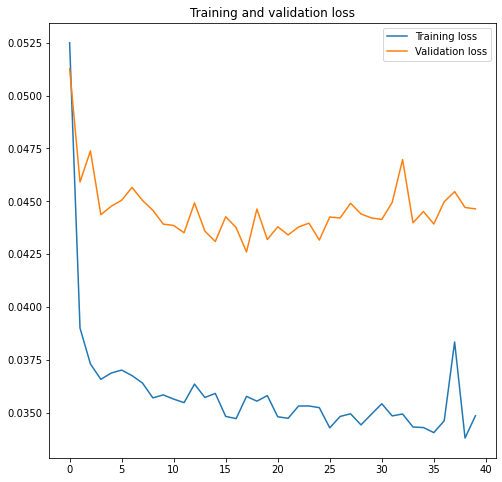

In [131]:
from matplotlib import pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.figure(figsize=(8,8))

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()